# **Importação dos dados**

In [97]:
import pandas as pd
df = pd.read_csv('Dados/covid.csv', sep=',')

# **Tratamento de dados**

**Nesta parte, foi realizado:** 
- Tradução das colunas e adaptação para nomes mais intuitivos.
- Renomeação de categorias e substituição das classes numéricas por textuais. Como será feita apenas uma análise semântica, podemos fazer essa substituiçãoe facilitar a visualização. Os valores que representam missing values também serão preenchidos com string, pois vamos verificar o impacto sobre a análise.
- Correção de tipagem de dados.
- Criação de uma coluna ID.

In [98]:
# Renomeando colunas
nomes = {
    'USMER': 'usmr', 
    'MEDICAL_UNIT': 'unidade_medica',
    'SEX': 'sexo', 
    'PATIENT_TYPE': 'tipo_paciente', 
    'DATE_DIED': 'data_obito', 
    'INTUBED': 'intubado',
    'PNEUMONIA': 'pneumonia', 
    'AGE': 'idade', 
    'PREGNANT': 'gravidez', 
    'DIABETES': 'diabetes', 
    'COPD': 'doenca_pulmonar_obstrutiva', 
    'ASTHMA': 'asma', 
    'INMSUPR': 'imunossuprimido',
    'HIPERTENSION': 'hipertensao', 
    'OTHER_DISEASE': 'outras_doencas', 
    'CARDIOVASCULAR': 'doenca_cardiovascular', 
    'OBESITY': 'obesidade',
    'RENAL_CHRONIC': 'doenca_renal_cronica', 
    'TOBACCO': 'fumante', 
    'CLASIFFICATION_FINAL': 'teste_covid', 
    'ICU':'uti'
}

df = df.rename(columns=nomes)

display(df.head(5))


# Renomeando categorias
categoria_bool = {
    1: 'Sim',
    2: 'Não',
    97: 'Não registrado',
    98: 'Não registrado',
    99: 'Não registrado'
}

categoria_sexo = {
    1: 'Mulher',
    2: 'Homem'
}

categoria_paciente = {
    1: 'Retornou para casa',
    2: 'Hospitalizado'
}

categoria_teste_covid = {
    1: 'Paciente diagnosticado',
    2: 'Paciente diagnosticado',
    3: 'Paciente diagnosticado',
    4: 'Não contaminado/Teste inconclusivo',
    5: 'Não contaminado/Teste inconclusivo',
    6: 'Não contaminado/Teste inconclusivo',
    7: 'Não contaminado/Teste inconclusivo'
}

datas = {
    '9999-99-99': '01/01/1900' # Substitui o padrão de data de não óbito por um modelo que facilita a correção de tipagem
}

bool_cols = ['intubado', 'pneumonia', 
             'gravidez', 'diabetes', 
             'doenca_pulmonar_obstrutiva', 
             'asma', 'imunossuprimido', 
             'hipertensao','outras_doencas', 
             'doenca_cardiovascular', 
             'obesidade','doenca_renal_cronica', 
             'fumante', 'uti']
df[bool_cols] = df[bool_cols].replace(categoria_bool)
df['sexo'] = df['sexo'].replace(categoria_sexo)
df['tipo_paciente'] = df['tipo_paciente'].replace(categoria_paciente)
df['teste_covid'] = df['teste_covid'].replace(categoria_teste_covid)
df['data_obito'] = df['data_obito'].replace(datas)


# Tipagem de dados
df['data_obito'] = pd.to_datetime(df['data_obito'], format='%d/%m/%Y')

# Criando uma coluna de ID
df['id_paciente'] = df.index.astype(str) + '_' + df['sexo']


display(df.head(5))
display(df.info())

,usmr,unidade_medica,sexo,tipo_paciente,data_obito,intubado,pneumonia,idade,gravidez,diabetes,...,asma,imunossuprimido,hipertensao,outras_doencas,doenca_cardiovascular,obesidade,doenca_renal_cronica,fumante,teste_covid,uti
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


,usmr,unidade_medica,sexo,tipo_paciente,data_obito,intubado,pneumonia,idade,gravidez,diabetes,...,imunossuprimido,hipertensao,outras_doencas,doenca_cardiovascular,obesidade,doenca_renal_cronica,fumante,teste_covid,uti,id_paciente
0,2,1,Mulher,Retornou para casa,2020-05-03,Não registrado,Sim,65,Não,Não,...,Não,Sim,Não,Não,Não,Não,Não,Paciente diagnosticado,Não registrado,0_Mulher
1,2,1,Homem,Retornou para casa,2020-06-03,Não registrado,Sim,72,Não registrado,Não,...,Não,Sim,Não,Não,Sim,Sim,Não,Não contaminado/Teste inconclusivo,Não registrado,1_Homem
2,2,1,Homem,Hospitalizado,2020-06-09,Sim,Não,55,Não registrado,Sim,...,Não,Não,Não,Não,Não,Não,Não,Paciente diagnosticado,Não,2_Homem
3,2,1,Mulher,Retornou para casa,2020-06-12,Não registrado,Não,53,Não,Não,...,Não,Não,Não,Não,Não,Não,Não,Não contaminado/Teste inconclusivo,Não registrado,3_Mulher
4,2,1,Homem,Retornou para casa,2020-06-21,Não registrado,Não,68,Não registrado,Sim,...,Não,Sim,Não,Não,Não,Não,Não,Paciente diagnosticado,Não registrado,4_Homem


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   usmr                        1048575 non-null  int64         
 1   unidade_medica              1048575 non-null  int64         
 2   sexo                        1048575 non-null  object        
 3   tipo_paciente               1048575 non-null  object        
 4   data_obito                  1048575 non-null  datetime64[ns]
 5   intubado                    1048575 non-null  object        
 6   pneumonia                   1048575 non-null  object        
 7   idade                       1048575 non-null  int64         
 8   gravidez                    1048575 non-null  object        
 9   diabetes                    1048575 non-null  object        
 10  doenca_pulmonar_obstrutiva  1048575 non-null  object        
 11  asma                    

None

Nosso dataframe agora possui 22 coluna traduzidas, nomes de categorias adaptadas e não requer correção na tipagem dos dados.<br>
Temos pouco mais de 1 milhão de registros reais sobre pacientes, mantida a identificação de cada um.


# **Integridade dos dados**


Todos as ocorrências "Não registrado" na coluna intubado e uti se referem a pacientes que retornaram para casa?

In [100]:
mask_retorno_casa = df['tipo_paciente'] == 'Retornou para casa'

for coluna in ['tipo_paciente', 'intubado', 'uti']:
    print('---', coluna, '---')
    print(df[mask_retorno_casa][coluna].value_counts())
    print('-----------------------------')

--- tipo_paciente ---
tipo_paciente
Retornou para casa    848544
Name: count, dtype: int64
-----------------------------
--- intubado ---
intubado
Não registrado    848544
Name: count, dtype: int64
-----------------------------
--- uti ---
uti
Não registrado    848544
Name: count, dtype: int64
-----------------------------


Filtrando apenas pelos pacientes que retornaram para casa, vemos que sobraram apenas ocorrências "Não registrado" nas colunas intubado e uti.<br>
Para aumentar nossa integridade de dados, vamos substituir essas ocorrências por "Paciente não hospitalizado".

In [101]:
substituir_retorno_casa = {
    'Não registrado':'Paciente não hospitalizado'
}

# df[['intubado', 'uti']][mask_retorno_casa] = df[['intubado', 'uti']][mask_retorno_casa].replace(substituir_retorno_casa) -- Não funciona, preciso usar o loc
df.loc[mask_retorno_casa, ['intubado', 'uti']] = df.loc[mask_retorno_casa, ['intubado', 'uti']].replace(substituir_retorno_casa)

for coluna in ['tipo_paciente', 'intubado', 'uti']:
    print('---', coluna, '---')
    print(df[coluna].value_counts())
    print('-----------------------------')

--- tipo_paciente ---
tipo_paciente
Retornou para casa    848544
Hospitalizado         200031
Name: count, dtype: int64
-----------------------------
--- intubado ---
intubado
Paciente não hospitalizado    848544
Não                           159050
Sim                            33656
Não registrado                  7325
Name: count, dtype: int64
-----------------------------
--- uti ---
uti
Paciente não hospitalizado    848544
Não                           175685
Sim                            16858
Não registrado                  7488
Name: count, dtype: int64
-----------------------------


Há homens com registro de gravidez? Os "não registrado" em gravidez são todos homens?

In [102]:
mask_h = (df['sexo'] == 'Homem') & ((df['gravidez'] == 'Sim') | (df['gravidez'] == 'Não'))
mask_m = (df['sexo'] == 'Mulher') & (df['gravidez'] == 'Não registrado')

print(f'Homens com registro de gravidez: {df[mask_h].shape[0]}')
print('\n')
print(f'Muheres com "Não registrado": {df[mask_m].shape[0]}')

Homens com registro de gravidez: 0


Muheres com "Não registrado": 3754


Não há homens com registro "Sim" ou "Não" para gravidez.<br>
Podemos usar uma nomenclatura que não remeta a um missing value, para a coluna de gravidez nos registros referentes a homens.

In [41]:
# categoria_gravidez = {
#     'Não registrado': 
# }

# **Respondendo às nossas perguntas**

### **a. Como deu-se a evolução dos óbitos? Foi linear ou tivemos períodos de picos e controles?**

In [103]:
# Cria duas novas colunas para obter o mês e ano dos óbitos
df['ano_obito'] = df['data_obito'].dt.year
df['mes_obito'] = df['data_obito'].dt.month

# Agrupa a soma de óbitos por mês e ano
mask_data = df['data_obito'] != '1900-01-01' # Remove os pacientes que sobreviveram
agrupamento_obitos = df[['id_paciente', 'ano_obito', 'mes_obito']][mask_data].groupby(by=['ano_obito', 'mes_obito']).count()
agrupamento_obitos

id_paciente
ano_obito mes_obito             
2020      1                  368
          2                  437
          3                  552
          4                 6926
          5                21314
          6                25278
          7                20457
          8                 1134
          9                   91
          10                  27
          11                  18
          12                  23
2021      1                   31
          2                   35
          3                   32
          4                  170
          5                   49

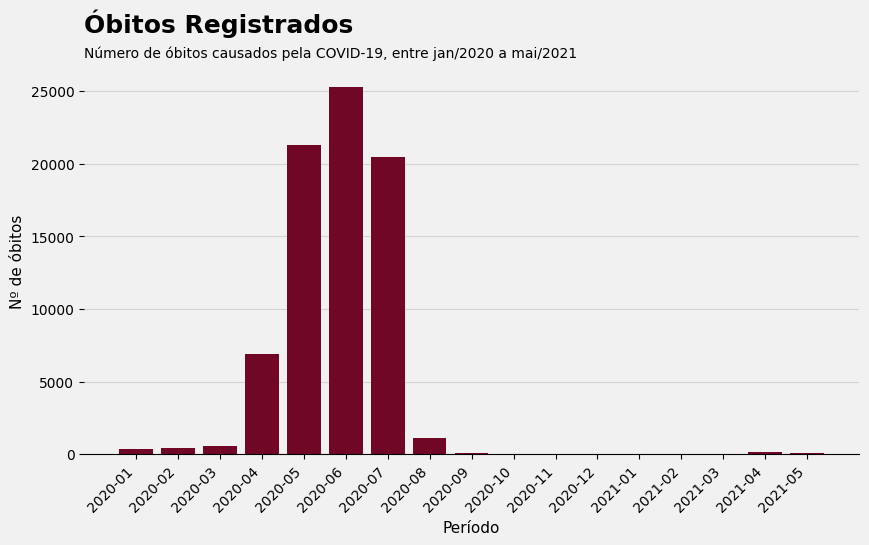

In [104]:
import matplotlib.pyplot as plt

# Reseta os índices para garantir a ordem temporal (o gráfico não plota sem isso)
agrupamento_obitos = agrupamento_obitos.reset_index()

# A função zip agrupa cada posição das colunas ano_obito e mes_obito em um par. Cada ano e mês é inserido em um posição da lista, resultando em uma lista ano-mes
periodo = [f"{ano}-{mes:02d}" for ano, mes in zip(agrupamento_obitos['ano_obito'], agrupamento_obitos['mes_obito'])]

# Cria os objetos figure e axes
fig, ax = plt.subplots(figsize=(10,5), facecolor='#F1F1F1')

# Insere gráfico no axes e define a cor de fundo
ax.bar(x=periodo, 
       height=agrupamento_obitos['id_paciente'],
       color = '#700726',
       zorder=2 # zorder determina a ordem em que cada elemento será criado no axes - as barras ficarão na frente das linhas de grade
       )
ax.set_facecolor('#F1F1F1')

# Título e subtítulo
ax.set_title('Óbitos Registrados\n', loc='left', fontweight='bold', fontsize=18)
ax.text(0,1.03,'Número de óbitos causados pela COVID-19, entre jan/2020 a mai/2021',transform=ax.transAxes)

# Labels dos eixos
ax.set_xlabel('Período', fontsize=11)
ax.set_ylabel('Nº de óbitos', fontsize=11)

# Remove bordas
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Linhas de grade na horizontal
ax.grid(axis='y', 
        color='lightgrey', 
        zorder=1 # Define que a grid será plotada antes das barras
       )

# Rotaciona as labels do eixo X em 45°
plt.xticks(rotation=45, ha='right')

plt.show()

Optamos por utilizar um gráfico de barras, em vez do tradicional gráfico de linhas, para visualizar a série temporal.

Pode-se notar que há um início levemente gradual a partir do mês de jan/2020 até março.<br>
No mês de abril do mesmo ano, dá-se início ao período da grande quantidade de casos e óbitos, que só se reduz no mês de agosto.<br>
Entre set/2020 até mar/2021 têm-se menos registros, que voltam a subir um pouco em abril e maio do mesmo ano.


### **b. Nos períodos com mais óbitos, podemos isolar os pacientes e ver qual predisposição de saúde  foi mais presente?**

In [105]:
mask_perido = (df['data_obito'] >= '2020-04-01') & (df['data_obito'] <= '2020-08-31')
df_obitos = df[mask_data]
display(df_obitos.head(5), df_obitos.shape)

tipos_obitos = df_obitos.dtypes
for coluna in tipos_obitos[df_obitos.dtypes == 'object'].index:
    print('---', coluna, '---')
    print(df_obitos[coluna].value_counts())
    print('-----------------------------')

# DROPAR OS Não registrado?

,usmr,unidade_medica,sexo,tipo_paciente,data_obito,intubado,pneumonia,idade,gravidez,diabetes,...,outras_doencas,doenca_cardiovascular,obesidade,doenca_renal_cronica,fumante,teste_covid,uti,id_paciente,ano_obito,mes_obito
0,2,1,Mulher,Retornou para casa,2020-05-03,Paciente não hospitalizado,Sim,65,Não,Não,...,Não,Não,Não,Não,Não,Paciente diagnosticado,Paciente não hospitalizado,0_Mulher,2020,5
1,2,1,Homem,Retornou para casa,2020-06-03,Paciente não hospitalizado,Sim,72,Não registrado,Não,...,Não,Não,Sim,Sim,Não,Não contaminado/Teste inconclusivo,Paciente não hospitalizado,1_Homem,2020,6
2,2,1,Homem,Hospitalizado,2020-06-09,Sim,Não,55,Não registrado,Sim,...,Não,Não,Não,Não,Não,Paciente diagnosticado,Não,2_Homem,2020,6
3,2,1,Mulher,Retornou para casa,2020-06-12,Paciente não hospitalizado,Não,53,Não,Não,...,Não,Não,Não,Não,Não,Não contaminado/Teste inconclusivo,Paciente não hospitalizado,3_Mulher,2020,6
4,2,1,Homem,Retornou para casa,2020-06-21,Paciente não hospitalizado,Não,68,Não registrado,Sim,...,Não,Não,Não,Não,Não,Paciente diagnosticado,Paciente não hospitalizado,4_Homem,2020,6


(76942, 24)

--- sexo ---
sexo
Homem     49540
Mulher    27402
Name: count, dtype: int64
-----------------------------
--- tipo_paciente ---
tipo_paciente
Hospitalizado         70066
Retornou para casa     6876
Name: count, dtype: int64
-----------------------------
--- intubado ---
intubado
Não                           41601
Sim                           26381
Paciente não hospitalizado     6876
Não registrado                 2084
Name: count, dtype: int64
-----------------------------
--- pneumonia ---
pneumonia
Sim               53923
Não               22285
Não registrado      734
Name: count, dtype: int64
-----------------------------
--- gravidez ---
gravidez
Não registrado    49607
Não               27246
Sim                  89
Name: count, dtype: int64
-----------------------------
--- diabetes ---
diabetes
Não               47946
Sim               28265
Não registrado      731
Name: count, dtype: int64
-----------------------------
--- doenca_pulmonar_obstrutiva ---
doenca_pulmonar_obstr

Index(['sexo', 'tipo_paciente', 'intubado', 'pneumonia', 'gravidez',
       'diabetes', 'doenca_pulmonar_obstrutiva', 'asma', 'imunossuprimido',
       'hipertensao', 'outras_doencas', 'doenca_cardiovascular', 'obesidade',
       'doenca_renal_cronica', 'fumante', 'teste_covid', 'uti', 'id_paciente'],
      dtype='object')